# Preprocessing 2. New Feature & Optimization To Do

1. New Features
- Family & Family Size
- Ticket Code

2. feature Optimization (로지스틱 회귀) <br> 텐서플로우 블로그의 핸즈온 머신러닝, 파이썬 머신러닝 / 머신러닝 관련 블로그 참고
- replacing outlier feature's value
- scaling

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../Data/trainPrePro1.csv')
test = pd.read_csv('../Data/testPrePro1.csv')

In [283]:
train_and_test = [train, test]

- --
# 1. New Features
- Family & Family Size

In [284]:
for ds in train_and_test:
    ds['Family'] = ds['SibSp'] + ds['Parch']

In [285]:
subset = pd.crosstab(train['Family'],train['Survived'])

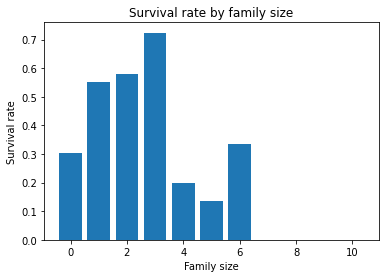

In [286]:
x = subset.index
y = subset[1]/(subset[0]+subset[1])

plt.title('Survival rate by family size')
plt.bar(x,y)
plt.xlabel('Family size')
plt.ylabel('Survival rate')
plt.show()

- --
# Family Size 해석

- Family Size 는 Family 를 3구간으로 나눈 것입니다. <br>제 해석은 이렇습니다. <br> 혼자일 때 보다 동승자가 있을 때 생존률이 높다. <br> 하지만 동승자가 지나치게 많을 때는 생존률이 낮아진다.



In [287]:
for ds in train_and_test:                               
    ds['Family_size'] = ds['Family'].replace(0,'S')

for ds in train_and_test:
    ds['Family_size'] = ds['Family_size'].replace([1,2,3],'M')
    ds['Family_size'] = ds['Family_size'].replace([4,5,6,7,8,9,10],'B')

- --
# 1. New Features
- Ticket Code / Ticket Code 2

- Ticket feature는 대부분 6자리의 숫자로 구성되어 있다. ex) 114352 <br> Ticket Code : ex) 114352 > 1 , 343234 > 3 <br> Ticket Code 2 : ex) 114352 > 11 , 343234 > 34 

- 여담, 나쁘지 않은 데이터라고 생각했다. <br>하지만 titanic set 은 데이터의 양이 굉장히 작기 때문에 훈련시키기에는 턱없이 모자란 양이라고 생각 <br> SVC 모델을 돌릴 때 Ticket Code 넣어봤는데 큰 효과가 없었다. <br>그리고 Ticket Code 는 Fare / Pclass 와 상관관계가 생각보다 높다. 훈련에 적합한 feature 인지는 잘 모르겠다.

- 훈련에서는 제외하겠음

In [288]:
for ds in train_and_test:
    ds['Ticket_Code2'] = train.Ticket.str.extract('([0-9][0-9])')

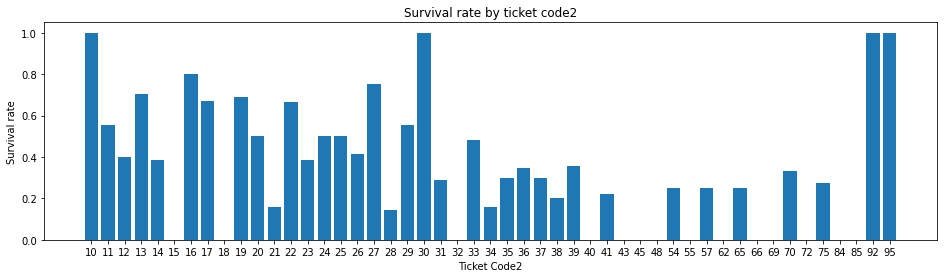

In [289]:
subset = pd.crosstab(train['Ticket_Code2'],train['Survived'])
plt.rcParams['figure.figsize'] = (16,4)
x = subset.index
y = subset[1]/(subset[0]+subset[1])

plt.title('Survival rate by ticket code2')
plt.xlabel('Ticket Code2')
plt.ylabel('Survival rate')
plt.bar(x,y)  # 티켓 코드에 따른 생존률
plt.show()

In [290]:
for ds in train_and_test:
    ds['Ticket_Code'] = train.Ticket_Code2.str.extract('([0-9])')

In [291]:
subset = pd.crosstab(train['Ticket_Code'],train['Survived'])

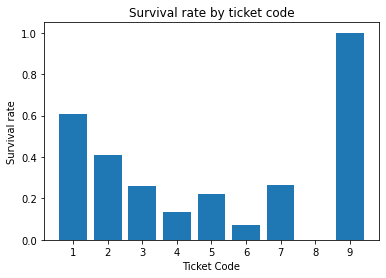

In [292]:
x = subset.index
y = subset[1]/(subset[0]+subset[1])

plt.rcParams['figure.figsize'] = (6,4)
plt.title('Survival rate by ticket code')
plt.xlabel('Ticket Code')
plt.ylabel('Survival rate')
plt.bar(x,y)
plt.show()

In [293]:
for ds in train_and_test: 
    ds['Ticket_Code'] = ds['Ticket_Code'].fillna(3) # 결측지 최빈값으로 대체 
    ds['Ticket_Code2'] = ds['Ticket_Code2'].fillna(34)

- --
# 2. feature Optimization

### 2.1 replacing outlier feature's value
- replacing outlier feature's value <br> 연속형 변수인 Age, Fare 는 standardScaler 를 진행할 예정 <br> 이상치에 민감하게 반응하지 않도록 이상치를 해결

- Age

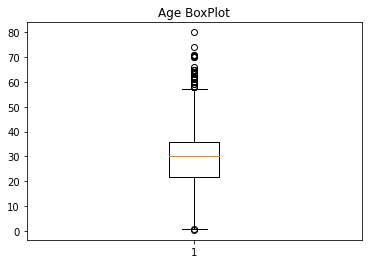

In [294]:
plt.boxplot(train['Age'])
plt.title('Age BoxPlot')
plt.show()

In [295]:
Age1Q = train['Age'].quantile(.25)
Age3Q = train['Age'].quantile(.75)
AgeIQR = Age3Q - Age1Q

print("Age1Q %f : Age3Q : %f AgeIQR : %f"%(Age1Q, Age3Q, AgeIQR))

Age1Q 21.810000 : Age3Q : 35.890000 AgeIQR : 14.080000


In [296]:
for ds in train_and_test:
    ds.loc[ds['Age'] > Age3Q + 1.5 * AgeIQR, 'Age'] = Age3Q
    ds.loc[ds['Age'] < Age1Q - 1.5 * AgeIQR, 'Age'] = Age1Q

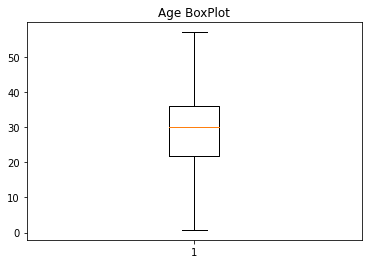

In [297]:
plt.boxplot(train['Age']) #대체 확인
plt.title('Age BoxPlot')
plt.show()

- Fare

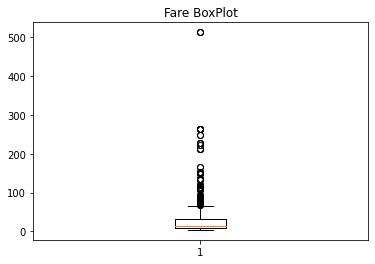

In [298]:
plt.boxplot(train['Fare'])
plt.title('Fare BoxPlot')
plt.show()

In [299]:
Fare1Q = train['Fare'].quantile(.25)
Fare3Q = train['Fare'].quantile(.75)
FareIQR = Fare3Q - Fare1Q

print("Fare1Q %f : Fare3Q : %f FareIQR : %f"%(Fare1Q, Fare3Q, FareIQR))

Fare1Q 7.925000 : Fare3Q : 32.204208 FareIQR : 24.279208


In [300]:
for ds in train_and_test:
    ds.loc[ds['Fare'] > Fare3Q + 1.5 * FareIQR, 'Fare'] = Fare3Q
    ds.loc[ds['Fare'] < Fare1Q - 1.5 * FareIQR, 'Fare'] = Fare1Q

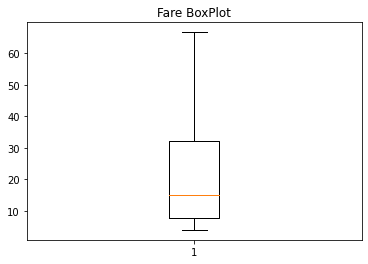

In [301]:
plt.boxplot(train['Fare']) # 대체 확인
plt.title('Fare BoxPlot')
plt.show()

- --
# 2. feature Optimization

### 2.2 Scaling - StandardScaler

In [302]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[['Age','Fare']])  # fit 은 train set 에만 적용 
for ds in train_and_test:
    subset = scaler.transform(ds[['Age','Fare']])
    ds['Age'] = subset[:,0]
    ds['Fare'] = subset[:,1]

- --
# 2. feature Optimization

### 2.3 Scaling - ONE HOT ENCODING

In [303]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  Title         891 non-null    object 
 13  Cabin_isin    891 non-null    object 
 14  Family        891 non-null    int64  
 15  Family_size   891 non-null    object 
 16  Ticket_Code2  891 non-null    object 
 17  Ticket_Code   891 non-null    object 
dtypes: float64(2), int64(6), objec

In [304]:
features_drop = ['Name','SibSp','Parch','Ticket','Cabin','Family','Ticket_Code2','Ticket_Code']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Title        891 non-null    object 
 8   Cabin_isin   891 non-null    object 
 9   Family_size  891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [308]:
train_and_test = [train, test]

In [309]:
for ds in train_and_test:
    ds['Pclass'] = ds['Pclass'].replace(1, 'F')
    ds['Pclass'] = ds['Pclass'].replace(2, 'S')
    ds['Pclass'] = ds['Pclass'].replace(3, 'T')

In [311]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [312]:
train.head()

,PassengerId,Survived,Age,Fare,Pclass_S,Pclass_T,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Cabin_isin_Y,Family_size_M,Family_size_S
0,1,0,-0.591596,-0.963378,0,1,1,0,1,0,1,0,0,0,1,0
1,2,1,0.805435,0.876837,0,0,0,0,0,0,0,1,0,1,1,0
2,3,1,-0.242338,-0.913601,0,1,0,0,1,1,0,0,0,0,0,1
3,4,1,0.543492,2.417770,0,0,0,0,1,0,0,1,0,1,1,0
4,5,0,0.543492,-0.904383,0,1,1,0,1,0,1,0,0,0,0,1


In [313]:
test.head()

,PassengerId,Age,Fare,Pclass_S,Pclass_T,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Cabin_isin_Y,Family_size_M,Family_size_S
0,892,0.499834,-0.920666,0,1,1,1,0,0,1,0,0,0,0,1
1,893,1.591265,-0.981814,0,1,0,0,1,0,0,1,0,0,1,0
2,894,0.621201,-0.783628,1,0,1,1,0,0,1,0,0,0,0,1
3,895,-0.155024,-0.859215,0,1,1,0,1,0,1,0,0,0,0,1
4,896,-0.591596,-0.591895,0,1,0,0,1,0,0,1,0,0,1,0


In [314]:
train.to_csv('../Data/trainPrePro2.csv', index=False)
test.to_csv('../Data/testPrePro2.csv', index=False)